In [5]:
#Importing the dataset
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import seaborn as sns

from scipy import stats

DS = '/Users/macbook/Desktop/DS/Projects/Bike demand sharing analysis/Bike.csv'

In [6]:
df = pd.read_csv(DS)

In [7]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


# DATA WRANGLING 

In [9]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
#To check the type of data 
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
#For a statistical summary
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
#checking for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
#Sanity checks 
#1 registered + casuals = cnt 
sum_columns = df['casual'] + df['registered']
df['cnt'] = sum_columns
print(df)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

In [14]:
#Month values should be 1 - 12 only 
df.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [15]:
#Hours should be between 0 - 23 only
df.hr.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [16]:
df.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [17]:
df.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [18]:
#Creating a new dataframe inp1
inp1 = pd.DataFrame(df)

In [19]:
inp1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
#Drop Registered, casual, instant, date column
inp1.drop(labels = ['casual','dteday','instant'], axis = 1, inplace = True)

In [21]:
inp1.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [22]:
df['cnt'].max()

977

In [23]:
df['cnt'].min()

1

# UNIVARIATE ANALYSIS

In [24]:
#Describe the numerical fields
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


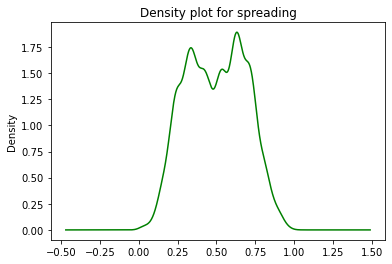

In [25]:
#Make a density plot for temp
inp1.temp.plot.density(color = 'green')
plt.title('Density plot for spreading')
plt.show()

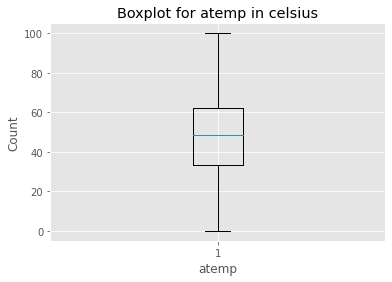

'The below boxplot shows that there are no ouliers'

In [26]:
#Boxplot for atemp.
#Look for outliers
style.use('ggplot')
plt.boxplot(inp1['atemp']*100)

plt.title('Boxplot for atemp in celsius')
plt.xlabel('atemp')
plt.ylabel('Count')

plt.show()


'''The below boxplot shows that there are no ouliers'''

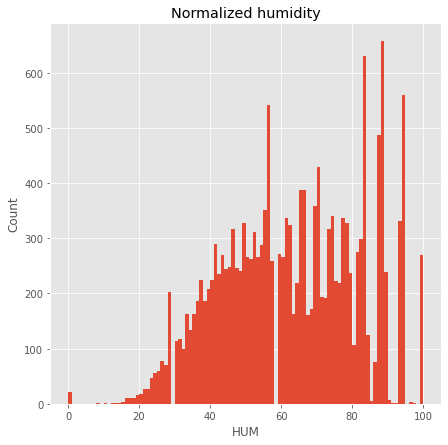

In [27]:
#Histogram for hum 
#Do you detect any abnormally high values?
style.use('ggplot')
plt.figure(figsize = (7,7))

plt.hist(inp1['hum']*100, bins = 100)

plt.title('Normalized humidity')
plt.xlabel('HUM')
plt.ylabel('Count')

plt.show()

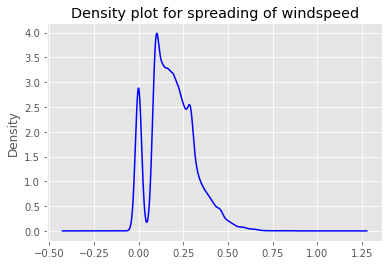

In [28]:
#Make a density plot for windspeed
inp1.windspeed.plot.density(color = 'blue')
plt.title('Density plot for spreading of windspeed')
plt.show()

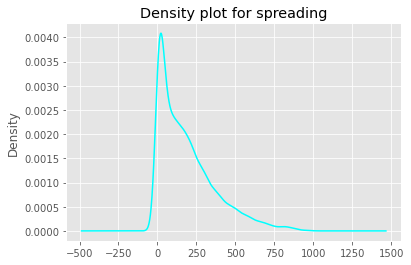

In [29]:
#Make a density plot for cnt
inp1.cnt.plot.density(color = 'cyan')
plt.title('Density plot for spreading')
plt.show()

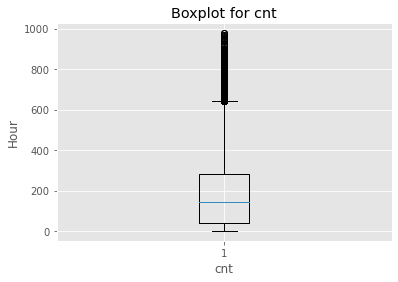

In [30]:
#Boxplot for cnt.
#Look for outliers
style.use('ggplot')
plt.boxplot(inp1['cnt'])

#plt.axis([0,1000,0,1000])
plt.title('Boxplot for cnt')
plt.xlabel('cnt')
plt.ylabel('Hour')

plt.show()



# Outlier Treatment

Treat the higher values in cnt column and drop the higher values from the desired cut-off.

In [31]:
min_threshold, max_threshold = inp1.cnt.quantile([0.001,0.775])
min_threshold, max_threshold

(1.0, 300.0)

In [32]:
inp1[inp1['cnt'] > max_threshold]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
1103,1,0,2,17,0,5,1,1,0.66,0.6212,0.34,0.3582,275,327
1634,1,0,3,15,0,0,0,1,0.48,0.4697,0.39,0.3284,155,304
1729,1,0,3,17,0,4,1,1,0.50,0.4848,0.42,0.1940,265,313
1730,1,0,3,18,0,4,1,2,0.46,0.4545,0.59,0.1642,260,310
1752,1,0,3,17,0,5,1,1,0.70,0.6364,0.37,0.3284,237,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17110,4,1,12,17,0,4,1,2,0.34,0.3333,0.66,0.1940,450,475
17111,4,1,12,18,0,4,1,2,0.34,0.3333,0.71,0.1940,359,381
17125,1,1,12,8,0,5,1,2,0.32,0.3030,0.57,0.2836,464,472
17134,1,1,12,17,0,5,1,2,0.26,0.2273,0.56,0.3284,297,321


In [33]:
inp1[inp1['cnt'] < min_threshold]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt


Maximum count of total rental bikes is 300 more than that can be removed/dropped 
Minimum count of total rental bikes is 1 and there is nothing less 

In [34]:
inp1.shape

(17379, 14)

In [35]:
inp2 = inp1[(inp1.cnt < max_threshold) & (inp1.cnt > min_threshold)]
inp2.shape

(13300, 14)

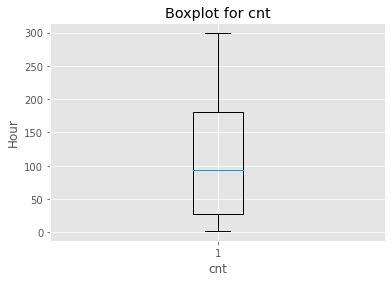

In [36]:
#Boxplot for cnt.
#Look for outliers
style.use('ggplot')
plt.boxplot(inp2['cnt'])

#plt.axis([0,1000,0,1000])
plt.title('Boxplot for cnt')
plt.xlabel('cnt')
plt.ylabel('Hour')

plt.show()



# Bivariate analysis

<AxesSubplot:xlabel='hr', ylabel='cnt'>

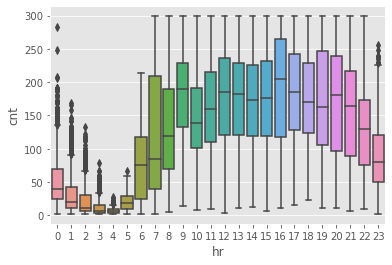

In [37]:
#1 Make a boxplot for cnt VS Hour 
sns.boxplot(x = 'hr', y = 'cnt', data = inp2)



<AxesSubplot:xlabel='weekday', ylabel='cnt'>

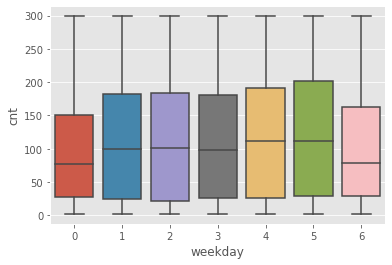

In [38]:
#2 Make a boxplot for cnt VS weekday
sns.boxplot(x = 'weekday', y = 'cnt', data = inp2)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

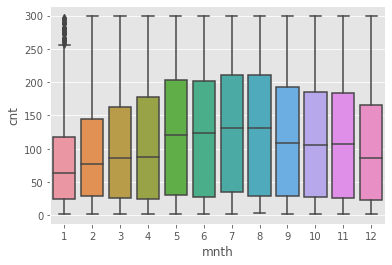

In [39]:
#3 Make a boxplot for cnt VS month
sns.boxplot(x = 'mnth', y = 'cnt', data = inp2)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

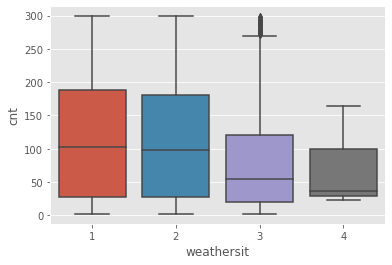

In [40]:
#4 Make a boxplot for cnt VS season
#1 Clear, few clouds, partly cloud
#2 Mist + Cloudy, mist + broken clouds, Miist + few clouds, mist
#3 Light snow, Light rain + thunderstorm + Scattered clouds
#4 Heavy rain + ice pellets + thunderstorm + mist, Snow + fog 
sns.boxplot(x = 'weathersit', y = 'cnt', data = inp2)

# ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.
If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

In [41]:
#Pearson correlation
Pearson_coef_atemp, p_value = stats.pearsonr(inp2['atemp'], inp2['cnt'])
Pearson_coef_atemp, p_value

(0.3151101845592776, 2.3048623990367733e-304)

In [42]:
Pearson_coef_temp, p_value = stats.pearsonr(inp2['temp'], inp2['cnt'])
Pearson_coef_temp, p_value

(0.31721932897402333, 1.204703470907792e-308)

In [43]:
Pearson_coef_hum, p_value = stats.pearsonr(inp2['hum'], inp2['cnt'])
Pearson_coef_hum, p_value

(-0.30854260483928964, 2.973446650096737e-291)

In [44]:
Pearson_coef_windspeed, p_value = stats.pearsonr(inp2['windspeed'], inp2['cnt'])
Pearson_coef_windspeed, p_value

(0.10244064521753302, 2.3091060629550701e-32)

In [45]:
#Correlation matrix
# Calculating correlation matrix
ContinuousCols=['temp','atemp','hum','windspeed']

# Creating the correlation matrix
CorrelationData = inp2[ContinuousCols].corr()
CorrelationData

,temp,atemp,hum,windspeed
temp,1.000000,0.989993,0.057191,-0.063910
atemp,0.989993,1.000000,0.068799,-0.108871
hum,0.057191,0.068799,1.000000,-0.289666
windspeed,-0.063910,-0.108871,-0.289666,1.000000


In [46]:
'''
Pearson coefficient 

correlation coefficient:
    close to +1 = Large positive relationship
    close to -1 = Large negative relationship
    close to 0 = No relationship
    
P-value:
    P-value < 0.001 strong certainity in the result
            < 0.05 Moderate certainity in the result
            < 0.1 weak certainity in the result
            > 0.1 No certainity in the result
'''

'\nPearson coefficient \n\ncorrelation coefficient:\n    close to +1 = Large positive relationship\n    close to -1 = Large negative relationship\n    close to 0 = No relationship\n    \nP-value:\n    P-value < 0.001 strong certainity in the result\n            < 0.05 Moderate certainity in the result\n            < 0.1 weak certainity in the result\n            > 0.1 No certainity in the result\n'

# Data preprocessing 

In [47]:
inp2.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0,0,2


In [48]:
Selectedcolumns = ['registered', 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 
                  'weathersit']

DataforML = inp2[Selectedcolumns]
DataforML.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit
0,13,1,1,0,0,6,0,1
1,32,1,1,1,0,6,0,1
2,27,1,1,2,0,6,0,1
3,10,1,1,3,0,6,0,1
6,0,1,1,6,0,6,0,1


In [49]:
#Saving the above file for ref during deployment
DataforML.to_pickle('DataforML.pkl')

# Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

1. Converting each Ordinal Categorical columns to numeric

2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping

3. Converting all other nominal categorical columns to numeric using pd.get_dummies()

4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In [50]:
#Creating dummies
inp3 = pd.get_dummies(DataforML)

#Adding target variable(cnt) to the data
inp3['cnt'] = inp2['cnt']

inp3.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,13,1,1,0,0,6,0,1,16
1,32,1,1,1,0,6,0,1,40
2,27,1,1,2,0,6,0,1,32
3,10,1,1,3,0,6,0,1,13
6,0,1,1,6,0,6,0,1,2


In [51]:
inp3.columns

Index(['registered', 'season', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'cnt'],
      dtype='object')

In [52]:
#Separate target variables and predictor variables
Targetvariables = 'cnt'
Predictors = ['registered', 'season', 'mnth', 'hr', 'holiday', 'weekday',
             'workingday', 'weathersit']

X = inp3[Predictors].values
Y = inp3[Targetvariables].values

#Spilit the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,
                                                   random_state = 428)

# Multiple Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

print(LR)

#Creating a model on training data
LRM = LR.fit(X_train, Y_train)
prediction = LRM.predict(X_test)

LinearRegression()


In [54]:
LRM.predict([[42,1,1,13,0,1,0,4]])

array([53.54226275])

In [55]:
from sklearn import metrics
import numpy as np

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(Y_train, LRM.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Targetvariables]=Y_test
TestingDataResults[('Predicted'+Targetvariables)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[Targetvariables,'Predicted'+Targetvariables]].head())

R2 Value: 0.9582124558162706

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0   42          53.0
1   24          23.0
2  173         193.0
3   32          28.0
4  126         149.0
